Forma de X: (100, 4)  - Forma de y: (100,)
FDR: [ 2.2590031   1.82441976 31.83009969 23.70346285]
Orden de características por FDR: [2 3 0 1]
Exactitud en cada paso de FFS: [1.0, 1.0, 1.0, 1.0]


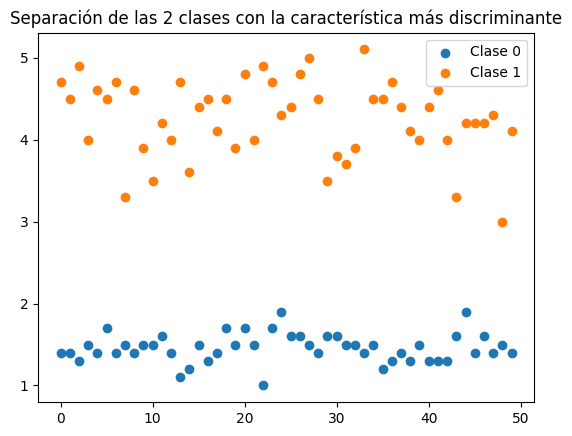

In [1]:
# -----------------------------------------------------------------------------
# 1) Selección de Características usando FDR (Fisher Discriminant Ratio)
#    y Ejemplo de Forward Feature Selection (FFS) en el dataset IRIS.
# -----------------------------------------------------------------------------

from sklearn.datasets import load_iris
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib import pyplot as plt

# Cargamos el dataset IRIS
Data = load_iris()
X = Data.data
y = Data.target

# Usamos sólo dos clases para simplificar (100 muestras)
X = X[:100, :]
y = y[:100]

print("Forma de X:", X.shape, " - Forma de y:", y.shape)

# Función para calcular la FDR entre dos clases
def calFDR(X, y):
    X1 = X[:50,:]   # muestras de la primera clase
    X2 = X[50:,:]   # muestras de la segunda clase
    m1 = np.mean(X1, axis=0)
    m2 = np.mean(X2, axis=0)
    s1 = np.std(X1, axis=0)
    s2 = np.std(X2, axis=0)
    fdr = ((m2 - m1)**2)/(s1**2 + s2**2)
    # Orden descendente
    ind = np.argsort(fdr)[::-1]
    return fdr, ind

fdr, ind1 = calFDR(X, y)
print("FDR:", fdr)
print("Orden de características por FDR:", ind1)

# Reordenamos X según el ranking de FDR
X1 = X[:, ind1]

# Forward Feature Selection (FFS)
accuracies = []
for i in range(X.shape[1]):
    X2 = X1[:, :(i+1)]
    X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3)
    clf1 = SVC(kernel='linear')
    clf1.fit(X_train, y_train)
    y_pred = clf1.predict(X_test)
    acc = np.sum(y_pred == y_test)/y_test.shape[0]
    accuracies.append(acc)

print("Exactitud en cada paso de FFS:", accuracies)

# Visualización rápida de la separación usando la característica más relevante
X_imp = X[:, 2]  # por ejemplo
X_class0 = X_imp[:50]
X_class1 = X_imp[50:]
idx = np.arange(50)
plt.scatter(idx, X_class0, label='Clase 0')
plt.scatter(idx, X_class1, label='Clase 1')
plt.title("Separación de las 2 clases con la característica más discriminante")
plt.legend()
plt.show()


In [7]:
Data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [8]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [9]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])